<a href="https://colab.research.google.com/github/christianlozano99/ChristianLozano/blob/master/TensorFlow-CovidLungs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Christian Lozano Assigment 5 Spring 2021**


## **Loading Libraries and GPU**

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import pathlib
import numpy as np
import os
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image



from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17174188639324771534
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4949437312
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14161451616487442372
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


## **Loading in the csv files for train and test**

In [ ]:
trainDF = pd.read_csv('/Users/Christian Lozano/Desktop/Assignment 5/assignment5_training_data_metadata.csv')
testDF = pd.read_csv('/Users/Christian Lozano/Desktop/Assignment 5/assignment5_test_data_metadata.csv')


print( trainDF.groupby('type').nunique())

                  id  image_name  label  cause
type                                          
Stress-Smoking     2           2      1      1
Virus           1407        1407      1      2
bacteria        2535        2535      1      1


### **Fixing Missing Data**
Dataframe was left empty on normal lungs so I replaced the empty spots with none since there is no cause or type. 

In [ ]:
trainDF['cause'] = trainDF['cause'].fillna('none')
trainDF['type'] = trainDF['type'].fillna('none')
print(trainDF.isnull().sum().sum())
print(testDF.isnull().sum().sum())
print(pd.unique(trainDF['type']))
trainDF

0
0
['none' 'Virus' 'bacteria' 'Stress-Smoking']


id                                         image_name     label  \
0        0                                  IM-0128-0001.jpeg    Normal   
1        1                                  IM-0127-0001.jpeg    Normal   
2        2                                  IM-0125-0001.jpeg    Normal   
3        3                                  IM-0122-0001.jpeg    Normal   
4        4                                  IM-0119-0001.jpeg    Normal   
5        5                                  IM-0117-0001.jpeg    Normal   
6        6                                  IM-0115-0001.jpeg    Normal   
7        7                                  IM-0189-0001.jpeg    Normal   
8        8                                  IM-0187-0001.jpeg    Normal   
9        9                                  IM-0185-0001.jpeg    Normal   
10      10                                  IM-0183-0001.jpeg    Normal   
11      11                                  IM-0182-0001.jpeg    Normal   
12      12                                  IM-0180-0001.jpeg    Normal   
13      13                                  IM-0178-0001.jpeg    Normal   
14      14                                  IM-0177-0001.jpeg    Normal   
15      15                                  IM-0176-0001.jpeg    Normal   
16      16                                  IM-0172-0001.jpeg    Normal   
17      17                                  IM-0170-0001.jpeg    Normal   
18      18                                  IM-0168-0001.jpeg    Normal   
19      19                                  IM-0166-0001.jpeg    Normal   
20      20                                  IM-0164-0001.jpeg    Normal   
21      21                                  IM-0162-0001.jpeg    Normal   
22      22                                  IM-0160-0001.jpeg    Normal   
23      23                                  IM-0158-0001.jpeg    Normal   
24      24                                  IM-0156-0001.jpeg    Normal   
25      25                                  IM-0154-0001.jpeg    Normal   
26      26                                  IM-0152-0001.jpeg    Normal   
27      27                                  IM-0151-0001.jpeg    Normal   
28      28                                  IM-0149-0001.jpeg    Normal   
29      29                                  IM-0147-0001.jpeg    Normal   
30      30                                  IM-0145-0001.jpeg    Normal   
31      31                                  IM-0143-0001.jpeg    Normal   
32      32                                  IM-0141-0001.jpeg    Normal   
33      33                                  IM-0140-0001.jpeg    Normal   
34      34                                  IM-0137-0001.jpeg    Normal   
35      35                                  IM-0135-0001.jpeg    Normal   
36      36                                  IM-0133-0001.jpeg    Normal   
37      37                                  IM-0131-0001.jpeg    Normal   
38      38                                  IM-0129-0001.jpeg    Normal   
39      39                                  IM-0239-0001.jpeg    Normal   
40      40                                  IM-0238-0001.jpeg    Normal   
41      41                                  IM-0237-0001.jpeg    Normal   
42      42                                  IM-0236-0001.jpeg    Normal   
43      43                                  IM-0235-0001.jpeg    Normal   
44      44                                  IM-0234-0001.jpeg    Normal   
45      45                                  IM-0231-0001.jpeg    Normal   
46      46                                  IM-0230-0001.jpeg    Normal   
47      47                                  IM-0229-0001.jpeg    Normal   
48      48                                  IM-0228-0001.jpeg    Normal   
49      49                                  IM-0227-0001.jpeg    Normal   
50      50                                  IM-0226-0001.jpeg    Normal   
51      51                                  IM-0225-0001.jpeg    Normal   
52      52                       

### **Translating Types to Ints**
We need to change the type to numbers 1 = normal, 2 = virus, 3 = bactiria, 4 = stress smoking

In [ ]:
 trainDF.type = trainDF.type.map( {'none':1 , 'Virus':2, 'bacteria':3, 'Stress-Smoking':4})

print( trainDF.groupby('type').nunique())
trainDF

        id  image_name  label  cause
type                                
1     1342        1342      1      1
2     1407        1407      1      3
3     2535        2535      1      2
4        2           2      1      1


id                                         image_name     label  \
0        0                                  IM-0128-0001.jpeg    Normal   
1        1                                  IM-0127-0001.jpeg    Normal   
2        2                                  IM-0125-0001.jpeg    Normal   
3        3                                  IM-0122-0001.jpeg    Normal   
4        4                                  IM-0119-0001.jpeg    Normal   
5        5                                  IM-0117-0001.jpeg    Normal   
6        6                                  IM-0115-0001.jpeg    Normal   
7        7                                  IM-0189-0001.jpeg    Normal   
8        8                                  IM-0187-0001.jpeg    Normal   
9        9                                  IM-0185-0001.jpeg    Normal   
10      10                                  IM-0183-0001.jpeg    Normal   
11      11                                  IM-0182-0001.jpeg    Normal   
12      12                                  IM-0180-0001.jpeg    Normal   
13      13                                  IM-0178-0001.jpeg    Normal   
14      14                                  IM-0177-0001.jpeg    Normal   
15      15                                  IM-0176-0001.jpeg    Normal   
16      16                                  IM-0172-0001.jpeg    Normal   
17      17                                  IM-0170-0001.jpeg    Normal   
18      18                                  IM-0168-0001.jpeg    Normal   
19      19                                  IM-0166-0001.jpeg    Normal   
20      20                                  IM-0164-0001.jpeg    Normal   
21      21                                  IM-0162-0001.jpeg    Normal   
22      22                                  IM-0160-0001.jpeg    Normal   
23      23                                  IM-0158-0001.jpeg    Normal   
24      24                                  IM-0156-0001.jpeg    Normal   
25      25                                  IM-0154-0001.jpeg    Normal   
26      26                                  IM-0152-0001.jpeg    Normal   
27      27                                  IM-0151-0001.jpeg    Normal   
28      28                                  IM-0149-0001.jpeg    Normal   
29      29                                  IM-0147-0001.jpeg    Normal   
30      30                                  IM-0145-0001.jpeg    Normal   
31      31                                  IM-0143-0001.jpeg    Normal   
32      32                                  IM-0141-0001.jpeg    Normal   
33      33                                  IM-0140-0001.jpeg    Normal   
34      34                                  IM-0137-0001.jpeg    Normal   
35      35                                  IM-0135-0001.jpeg    Normal   
36      36                                  IM-0133-0001.jpeg    Normal   
37      37                                  IM-0131-0001.jpeg    Normal   
38      38                                  IM-0129-0001.jpeg    Normal   
39      39                                  IM-0239-0001.jpeg    Normal   
40      40                                  IM-0238-0001.jpeg    Normal   
41      41                                  IM-0237-0001.jpeg    Normal   
42      42                                  IM-0236-0001.jpeg    Normal   
43      43                                  IM-0235-0001.jpeg    Normal   
44      44                                  IM-0234-0001.jpeg    Normal   
45      45                                  IM-0231-0001.jpeg    Normal   
46      46                                  IM-0230-0001.jpeg    Normal   
47      47                                  IM-0229-0001.jpeg    Normal   
48      48                                  IM-0228-0001.jpeg    Normal   
49      49                                  IM-0227-0001.jpeg    Normal   
50      50                                  IM-0226-0001.jpeg    Normal   
51      51                                  IM-0225-0001.jpeg    Normal   
52      52                       

### **Setting up Classes for Tensor**
It has an if statment with false passed to it because I did it once and it casued errors everytime I ran my code over again since its already moved.

In [ ]:
import shutil

numnorm = 0
numstress = 0
numbac = 0
numvirus = 0
if(False):
  for value in range(len(trainDF.index)):
    if(trainDF['type'][value] == 1 ): #1 is normal
      numnorm += 1
      shutil.move('/Users/Christian Lozano/Desktop/Assignment 5/train/train/'+trainDF['image_name'][value] , '/Users/Christian Lozano/Desktop/Assignment 5/train/Normal/'+trainDF['image_name'][value])

    elif(trainDF['type'][value] == 2):#2 is Virus
      numvirus += 1
      shutil.move('/Users/Christian Lozano/Desktop/Assignment 5/train/train/'+trainDF['image_name'][value] , '/Users/Christian Lozano/Desktop/Assignment 5/train/Virus/'+trainDF['image_name'][value])

    elif(trainDF['type'][value] == 3):#3 is bactira
      numbac += 1
      shutil.move('/Users/Christian Lozano/Desktop/Assignment 5/train/train/'+trainDF['image_name'][value] , '/Users/Christian Lozano/Desktop/Assignment 5/train/Bacteria/'+trainDF['image_name'][value])
    
    elif(trainDF['type'][value] == 4):#4 is stress smoking
      numstress += 1
      shutil.move('/Users/Christian Lozano/Desktop/Assignment 5/train/train/'+trainDF['image_name'][value] , '/Users/Christian Lozano/Desktop/Assignment 5/train/Stress-Smoking/'+trainDF['image_name'][value])
    
  print(numnorm)
  print(numvirus)
  print(numbac)
  print(numstress)


### **Making the Tensor to feed into the CNN**

In [ ]:
trainImageDir = '/Users/Christian Lozano/Desktop/Assignment 5/train'
testImageDir = '/Users/Christian Lozano/Desktop/Assignment 5/test'

Traindata_dir = tf.keras.utils.get_file(origin ='/train', fname = trainImageDir)
Testdata_dir = tf.keras.utils.get_file(origin ='/test', fname = testImageDir)

batch_sizein = 32
TrainTensor = tf.keras.preprocessing.image_dataset_from_directory(Traindata_dir, image_size=(180, 180), batch_size=batch_sizein)
TestTensor =  tf.keras.preprocessing.image_dataset_from_directory(Testdata_dir, image_size=(180, 180), batch_size=batch_sizein)



Found 5286 files belonging to 4 classes.
Found 624 files belonging to 5 classes.


### **Validation Dataset**
Making a validation set based of 20% of the data to see how accurate I am.

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  Traindata_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=batch_sizein)

Found 5286 files belonging to 4 classes.
Using 1057 files for validation.


### **Example Images**
Wanted to see what some of the images looked like so far to know what kind of data augmentation I should use.

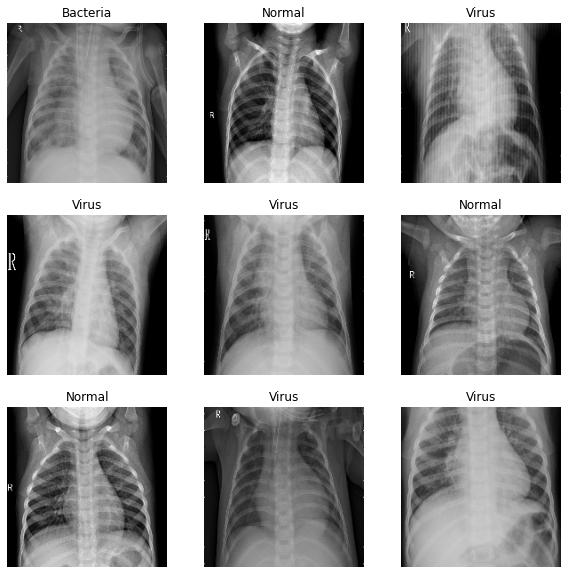

In [ ]:
import matplotlib.pyplot as plt
 
class_names = TrainTensor.class_names
plt.figure(figsize=(10, 10))
for images, labels in TrainTensor.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### **Setting up the CNN Model**
I used 3 data augmentation functions which were:

1.   **Random Rotation**
2.   **Random Translation**
3.   **Random Zoom**

I chose these based on the fact that some of the images seemed to have more zoom than others for instance some I can see the colar bone and some I cant.
Also some were angled a bit diffrently so I used a small rotation factor of 0.1, and finally I used random tranlsation because some of the images were more shifted to one side than the other so this would make the model not be affected by it.

In [ ]:
num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.2, .3), width_factor=(-.2,.3), fill_mode='reflect', interpolation='nearest',seed=None,name=None, fill_value=0.0,),
  layers.experimental.preprocessing.RandomZoom(height_factor=(-0.2, .2), width_factor=(-.2,.2), fill_mode='reflect', interpolation='nearest',seed=None,name=None, fill_value=0.0,),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(batch_sizein, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(batch_sizein, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(batch_sizein, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(batch_sizein, activation='relu'),
  layers.Dense(num_classes)
])

### **Compiling the Model**

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

### **Fitting the Model**
I am fitting the model and testing for accuracies to see what will be the most effective and would not underfit or over fit my images.

In [ ]:
model.fit(
  TrainTensor,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
166/166 [==============================] - 44s 249ms/step - loss: 1.0920 - accuracy: 0.4643 - val_loss: 1.0083 - val_accuracy: 0.5591
Epoch 2/30
166/166 [==============================] - 43s 250ms/step - loss: 0.9916 - accuracy: 0.5301 - val_loss: 0.9822 - val_accuracy: 0.5620
Epoch 3/30
166/166 [==============================] - 44s 256ms/step - loss: 0.9269 - accuracy: 0.5679 - val_loss: 0.7556 - val_accuracy: 0.6348
Epoch 4/30
166/166 [==============================] - 44s 254ms/step - loss: 0.8138 - accuracy: 0.6367 - val_loss: 0.7856 - val_accuracy: 0.6225
Epoch 5/30
166/166 [==============================] - 44s 258ms/step - loss: 0.7607 - accuracy: 0.6582 - val_loss: 0.7916 - val_accuracy: 0.6140
Epoch 6/30
166/166 [==============================] - 43s 254ms/step - loss: 0.7343 - accuracy: 0.6808 - val_loss: 0.6399 - val_accuracy: 0.7029
Epoch 7/30
166/166 [==============================] - 44s 259ms/step - loss: 0.7026 - accuracy: 0.6946 - val_loss: 0.6125 - val_ac

### **Running the Model**
I had a small test function to see how confident my program is with an arbitrary image. Then I ran it for all the images in the test Dataframe.

In [ ]:
from tensorflow import keras

test = '/Users/Christian Lozano/Desktop/Assignment 5/train/Bacteria/person1_bacteria_1.jpeg'
img = keras.preprocessing.image.load_img(
    test, target_size=(180, 180)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

IDs = []
results = []
for value in range(len(testDF.index)):
  fileLocation = '/Users/Christian Lozano/Desktop/Assignment 5/test/test/' + testDF['image_name'][value]
  img = keras.preprocessing.image.load_img(fileLocation, target_size=(180, 180))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  prediction = class_names[np.argmax(score)]

  if(prediction == 'Normal'): #1 is normal
    IDs.append(testDF['id'][value])
    results.append(1)

  elif(prediction == 'Virus'):#2 is Virus
    IDs.append(testDF['id'][value])
    results.append(2)

  elif(prediction == 'Bacteria'):#3 is bactira
    IDs.append(testDF['id'][value])
    results.append(3)
  
  elif(prediction == 'Stress-Smoking'):#4 is stress smoking
    IDs.append(testDF['id'][value])
    results.append(4)
  
len(results)

This image most likely belongs to Bacteria with a 65.06 percent confidence.


624

### **Submission**
Generating a submission out put with the apporpiate indexes since the ID doesn't start from 1.

In [ ]:
submission = pd.DataFrame({"id": IDs,"type": results})
submission.to_csv('/Users/Christian Lozano/Desktop/submission.csv', index = False)
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(submission)

       id  type
0    5309     1
1    5310     1
2    5311     1
3    5312     1
4    5313     1
5    5314     1
6    5315     1
7    5316     1
8    5317     1
9    5318     1
10   5319     1
11   5320     1
12   5321     2
13   5322     1
14   5323     1
15   5324     1
16   5325     3
17   5326     1
18   5327     1
19   5328     1
20   5329     1
21   5330     1
22   5331     2
23   5332     1
24   5333     1
25   5334     1
26   5335     1
27   5336     1
28   5337     2
29   5338     1
30   5339     1
31   5340     1
32   5341     1
33   5342     2
34   5343     1
35   5344     1
36   5345     1
37   5346     1
38   5347     1
39   5348     1
40   5349     1
41   5350     1
42   5351     1
43   5352     3
44   5353     3
45   5354     1
46   5355     1
47   5356     1
48   5357     1
49   5358     1
50   5359     1
51   5360     1
52   5361     1
53   5362     1
54   5363     1
55   5364     1
56   5365     1
57   5366     1
58   5367     1
59   5368     1
60   5369     1
61   537